In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

#### Kernel

In [2]:
def squared_exponential_kernel(a, b, sigma=1, l=1):
    sqdist = np.subtract.outer(a, b)**2
    cov = sigma**2 * np.exp(-0.5 * sqdist / l**2)
    return cov.squeeze()

#### Posterior mean & co-variance function

In [3]:
def posterior(x_star, x, y):
    N = x.shape[0]
    N_star = x_star.shape[0]
    K = (squared_exponential_kernel(x, x)+1e-6*np.eye(N)).reshape(N, N)
    K_star = squared_exponential_kernel(x_star, x).reshape(N_star, N)
    K_star_star = squared_exponential_kernel(x_star, x_star).reshape(N_star, N_star)
    CK = np.linalg.inv(K).dot(K_star.T)
    mu_new = CK.T.dot(y)
    K_new = K_star_star - K_star.dot(CK) + 1e-6*np.eye(N_star)
    return mu_new.squeeze(), np.diag(K_new.squeeze())

In [4]:
N = 1000
x_star = np.linspace(0,1,N)

#### Real Objective Function
y = x^2 * sin(5 * PI * x)^6

In [13]:
def objective(x, noise=0):
    noise = np.random.normal(loc=0, scale=noise)
    return (x**2 * np.sin(5 * np.pi * x)**6.0) + noise

In [14]:
y_star = objective(x_star)
i = y_star.argmax(axis=0)
print(x_star[i],y_star[i])

0.9019019019019019 0.8112516409061398


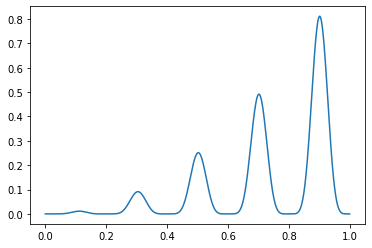

In [15]:
plt.plot(x_star, y_star);

#### random start

In [38]:
for itteration in range(20):
    if itteration == 0:
        x = np.random.choice(x_star,1)
        y = objective(x)
        print("random x & y :", x, "&", y)

    mu_star, sd_star = posterior(x_star, x, y)
    best = max(mu_star)
    acq = norm.cdf((mu_star - best) / (sd_star+1E-9))
    
    x_new = x_star[acq.argmax()]
    while x_new in x:
        x_new = np.random.choice(x_star,1)
    
    y_new = objective(x_new)
    #print("new x & y :", x_new, "&", y_new)
    x = np.append(x, x_new)
    y = np.append(y, y_new)
    print("best so far", x[y.argmax()], y[y.argmax()])
    

random x & y : [0.1001001] & [0.01001996]
best so far 0.10010010010010009 0.010019955721432204
best so far 0.10010010010010009 0.010019955721432204
best so far 0.10010010010010009 0.010019955721432204
best so far 0.10010010010010009 0.010019955721432204
best so far 0.10010010010010009 0.010019955721432204
best so far 0.10010010010010009 0.010019955721432204
best so far 0.10010010010010009 0.010019955721432204
best so far 0.10010010010010009 0.010019955721432204
best so far 0.948948948948949 0.12408349249918459
best so far 0.933933933933934 0.35601451964788894
best so far 0.9089089089089089 0.7788289317327501
best so far 0.9089089089089089 0.7788289317327501
best so far 0.9089089089089089 0.7788289317327501
best so far 0.9089089089089089 0.7788289317327501
best so far 0.9089089089089089 0.7788289317327501
best so far 0.9089089089089089 0.7788289317327501
best so far 0.9089089089089089 0.7788289317327501
best so far 0.9089089089089089 0.7788289317327501
best so far 0.9009009009009009 0.8

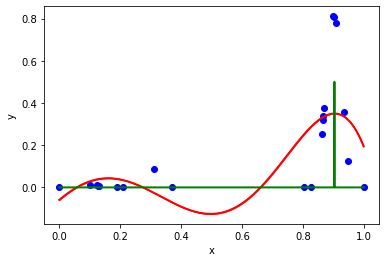

In [39]:
# plot mean and 2σ intervals
plt.plot(x_star, mu_star, 'r', lw=2, label="mean and 2σ region");
plt.plot(x_star, mu_star + 2*sd_star, 'r', lw=1);
plt.plot(x_star, mu_star - 2*sd_star, 'r', lw=1);
plt.fill_between(x_star.flatten(), mu_star - 2*sd_star, mu_star + 2*sd_star, color="r", alpha=0.5);
plt.plot(x_star, acq, 'g', lw=2, label="acquisition");
plt.scatter(x, y, color="blue");
plt.xlabel("x");
plt.ylabel("y");
plt.show();

In [40]:
x[y.argmax()], y[y.argmax()]

(0.9009009009009009, 0.8111349573617112)